### **Loading the Data set**

In [1]:
#Importing pandas to read the data set
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (3).xlsx


In [3]:
df =pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

**Before we proceed with data preprocessing first let's start with Exploratory data analysis**

 - To understand the data set which mean does the data set have any patterns or issues so we can fix them in preprocessing section.For now let's begin with Eploratory data analysis.

 - Through visualization and statistics we can observe the insights by using techniques like summary stats,plots,correlation heat maps,missing values

 ---

## **Exploratory Data anlysis**

In [4]:
#Displaying the infos of data set to understand the data structure like rows,columns,data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### **Observations**

 - **Approximately there are 4K entries in the data set means they collected 4K customers details.**

 - **It seems there are no missing values in the data set and there is no inconsistencies in the datatypes of the columns.**

 - **Let's see if there are any outliers and extreme values in visualization section.**

 - **A total of 12 numerical columns about how many miles and transactions does a customer travelled and performed respectively in diiferent fields.to study their flying patterns,earnings,use of frequent flyer rewards,and their use of airline credit cards.**

 - **Let's learn more about the customers further in statistical analysis of the data set.**

### **Statistical Summary**

In [5]:
#Displaying a few rows to review
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
#Stats summary
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
#Skewness and Kurtosis
Skewness=df.skew()
Kurtosis=df.kurtosis()
stats_table=pd.DataFrame({"Skewness":Skewness,"Kurtosis":Kurtosis})

stats_table

,Skewness,Kurtosis
ID#,-0.003343,-1.199648
Balance,5.004187,44.157932
Qual_miles,7.512395,67.689351
cc1_miles,0.857569,-0.748508
cc2_miles,11.210459,133.786489
cc3_miles,17.195532,308.654728
Bonus_miles,2.842093,13.630489
Bonus_trans,1.157362,2.745737
Flight_miles_12mo,7.451666,94.761019
Flight_trans_12,5.490461,42.978152


### **General Observations**

#### **From statistics**

 - ID# the unique identifier column of the data set has range from 1 to 4021 but the entries are 3999 means a few were dropped might be because of missing values.

 - In balance the range is huge compared to others min:0 max:1.7mil while the average and standard deviation are around 70k and 100k respectively which suggests right-skewed data.

 - The range of no.of miles to be qualified to have top flight status is also big .the avg is 144 while std is 770 means most of the customers have low qualifying miles with a few having very high considering the 75th percentile being 0.

 - It appears that most of the customers who has cc1_miles have only earned a couple of miles since cc1_miles has mean of 2 and avg of 1.

 - While cc2,cc3 miles customer only earned a mile with only few earning 3-5 miles.

 - When it comes to bonus miles and transactions there are completely different from cc miles.The bonus miles has range of 0-250k with avg and std of 17k and 24 respectively  suggests that selective number of customers have high no.of bonus miles.the earnings of miles per transaction is low means that only few are earning while other never do.

 - The flight activity(miles&transactions) of customers in the past 12 months have a median of 0 means most of the customers are inactive in he past 12 months.

 - Customers have enrolled to this program from mim 2 days - 8k days mean approax ~22 years with average around 11 years.

 - The avg of awards(0.37) suggests that almost 37% got awarded while 63% didn't.

 #### **From Skewness and Kurtosis**

 - Variables like Qual_miles-7.51,cc2_miles-11.21,cc3_miles-17.20, Flight_miles_12mo-7.45, and Balance-5.00 are heavily right-skewed.

 - Whiles some of them have slightly right skewed with few of them are symmetrical.

 - Balance,Qual_miles,cc2,cc3_miles,flight_miles&trans are exremely kurtosis >40 which is suggests outliers and exreme values

 - bonus_miles&trans have some high kurtosis while ID#,days_since enroll,awards have low kurtosis with light tails means more uniformly spread.

In [8]:
df.isnull().sum() #Making sure there's no presence of missing values

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


### **Data Visualizzation**




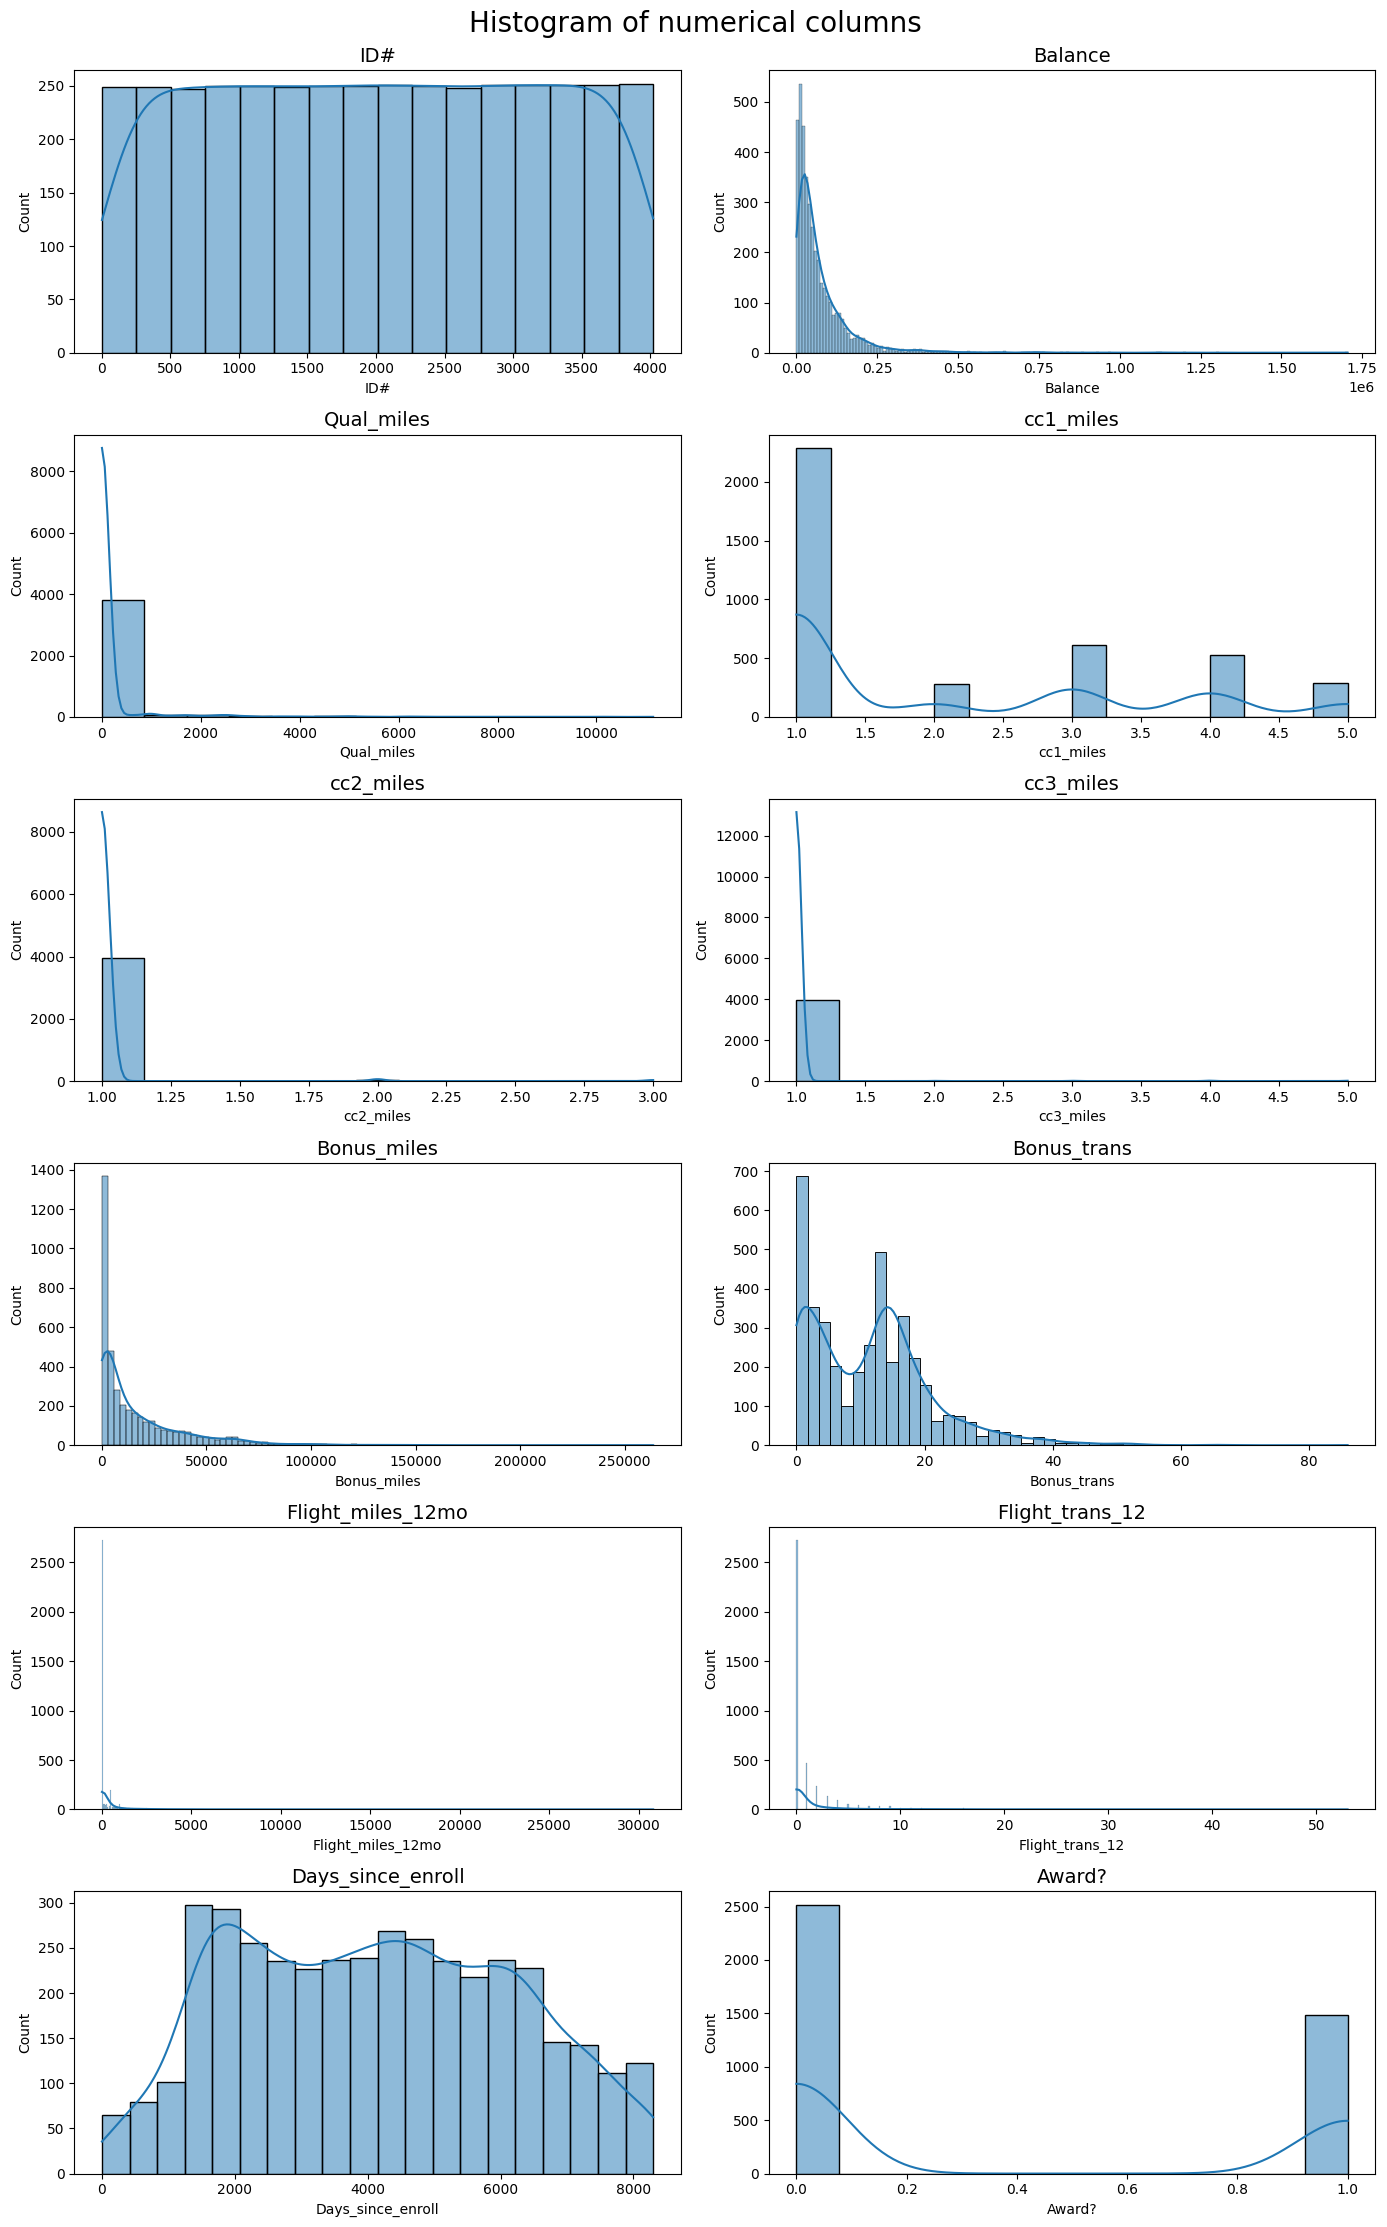

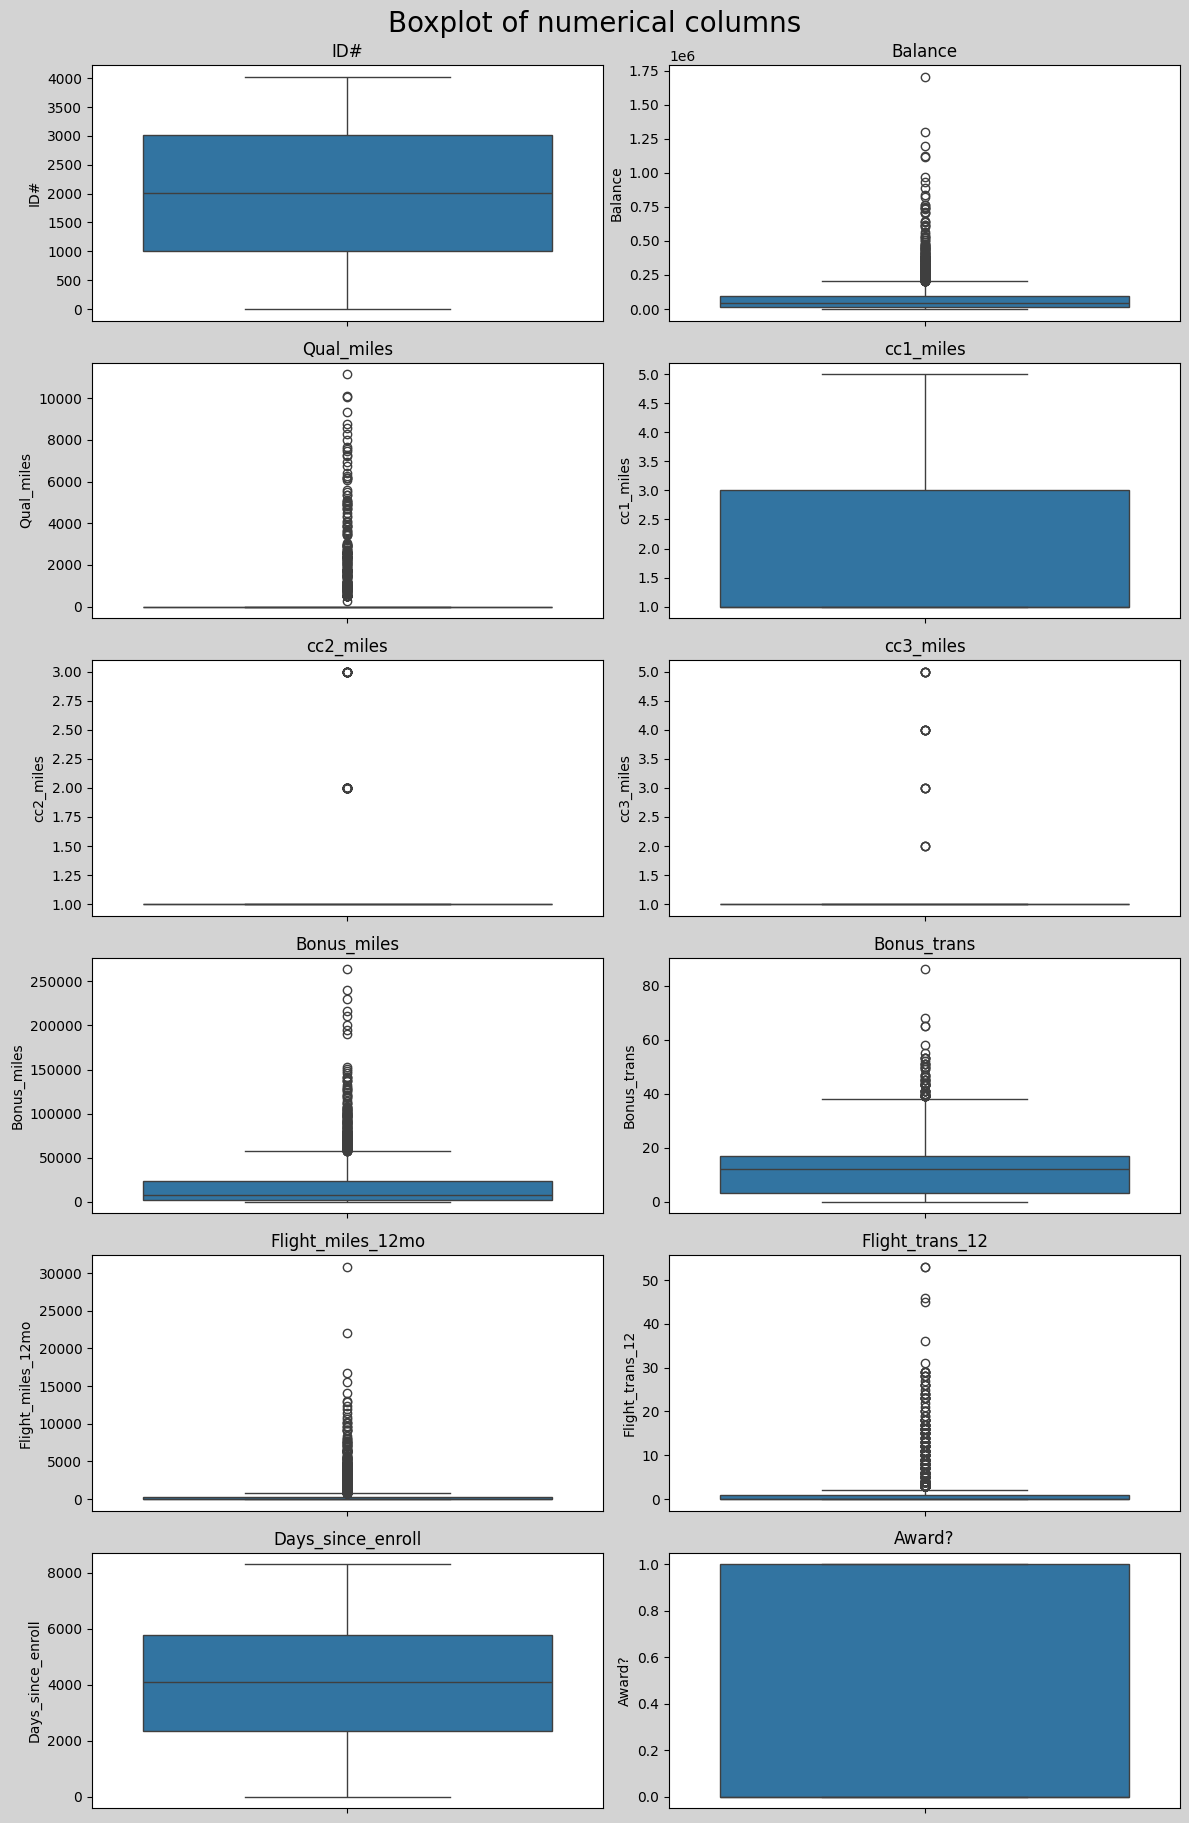

In [9]:
#Importing necessary libraries to visualize different plots
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols=df.select_dtypes(include=["int64","float64"]).columns

#Histogram of all numerical columns
fig, axes = plt.subplots(6, 2, figsize=(14, 22))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col,fontsize= 14)

plt.tight_layout()
plt.suptitle("Histogram of numerical columns",fontsize=20,y= 1.01)
plt.show()

#Boxplotting the numerical columns
plt.figure(figsize=(12,18),facecolor="lightgrey")
for i,col in enumerate(numerical_cols):
    plt.subplot(6,2, i + 1)
    sns.boxplot(y =df[col])
    plt.title(col)

plt.tight_layout()
plt.suptitle("Boxplot of numerical columns",fontsize=20,y= 1.01)
plt.show()

<Figure size 1400x2400 with 0 Axes>

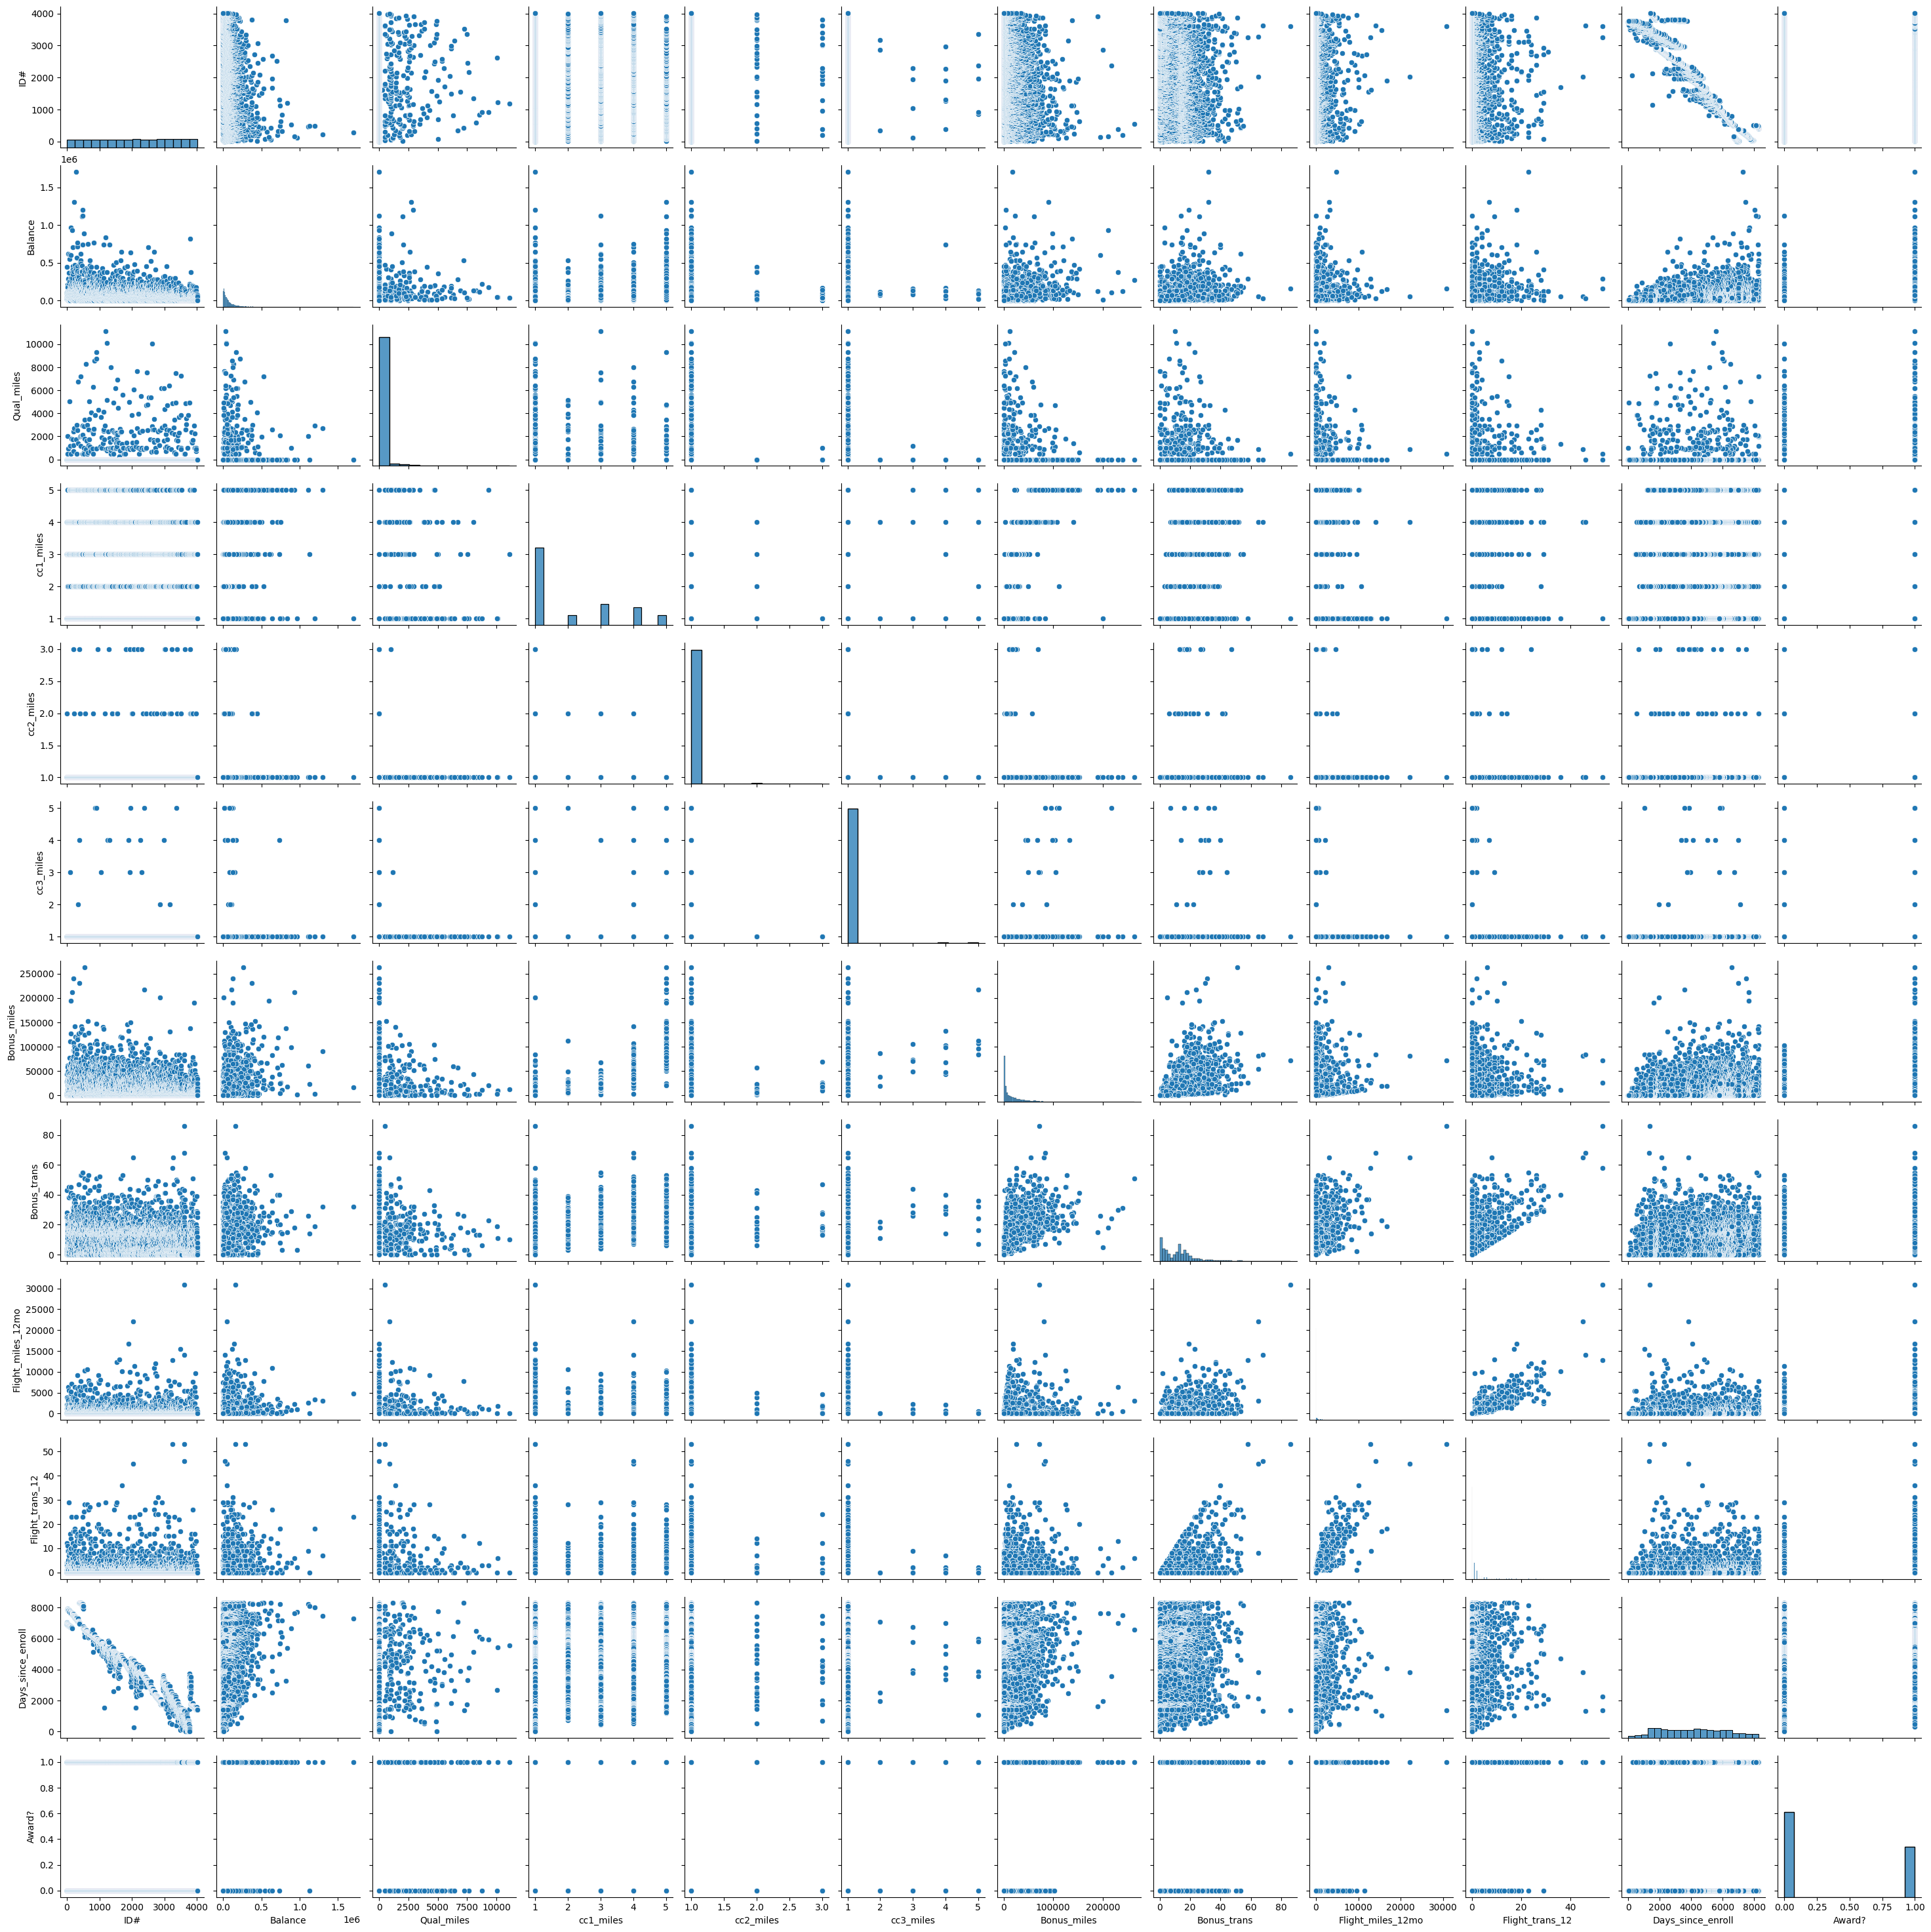

In [10]:
#Creating Scatter plot of all columns

plt.figure(figsize=(14,24),facecolor="lightgrey")
sns.pairplot(df)
plt.show()

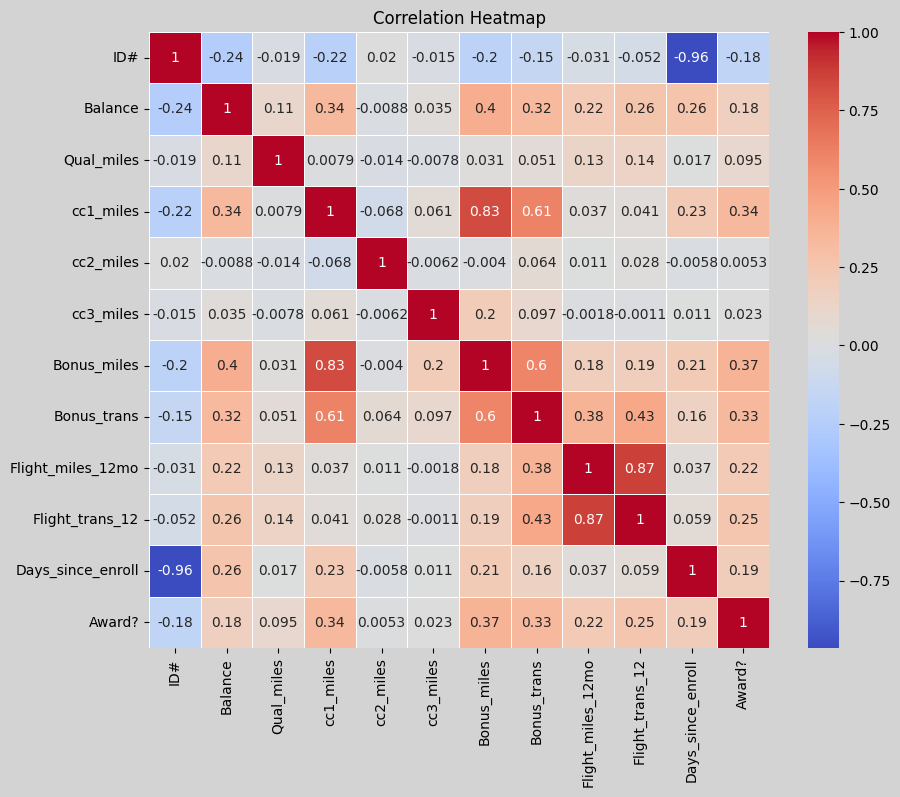

In [11]:
#creating correlation heatmap of all columns
corr_matrix =df[numerical_cols].corr()

#Visualization of the correlation heatmap
plt.figure(figsize=(10, 8),facecolor="lightgrey")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### **Insights and Patterns**

#### **From Histograms And Boxplots **

 - *ID#* - Uniformly distributed - No outliers(~sequence)
  > Which is expected for an  identifier column. there are no meaningful patterns here.
 - *Balance* - Highly right-skewed - A lot of out liers
  > Which means most customers have a low balance,with a few have extremely high mileage balances.
   Suggests a small group of high-value customers.
 - *Qual_miles* (Qualifying Miles) - Highly right-skewed - A lot of extreme values
  > Most values are zero suggesting that most customers do not qualify for elite status.
 - *cc1_miles, cc2_miles, cc3_miles*(Credit Card Miles) - Have a few outliers
  >- cc1_miles shows a few peaks at 1, 2, 3, etc., indicates discrete values.
- cc2_miles and cc3_miles are "highly right-skewed",which most people have low miles from these cards.
- Suggests that only a small percentage of customers earn significant miles via credit cards.
 - *Bonus_miles* - Right-skewed - Heavy amount of outliers
  > Only a few customers are earning a huge number of bonus miles.
    suggesting loyalty rewards may favored high spenders or frequent travelers.

 - *Bonus_trans*(Transactions) - multiple peaks - With many outliers
  > through transactions only a few customers are frequently earning bonus miles, while others never do.
this Could be indicating different customer engagement levels.
 - *Flight_miles_12mo & Flight_trans_12* - Highly right-skewed - With significant outliers
  > A lot customers have zero flight miles and transactions in the last 12 months.Suggesting many inactive or infrequent flyers.
 - *Days_since_enroll* -Uniform distribution - with few outliers
  > All customers have different enrollment times.there are no particular patterns, but suggests a long-standing loyalty program.
 - *Award?* - Binary distribution (0 or 1).
  > Majority of values are 0, most of the customers didn't receive an award.
Confirms that award status is selective.

### **From Scatterplots And Heatmap**

 - Some of the feature's relationships are appear to be non-linear for instance Balance vs. Bonus_miles.

 - Features that are related to past 12 months flight miles and transactions (Flight_miles_12mo, Flight_trans_12) shows little correlation.

 - Relationship between Bonus_miles and Bonus_trans seems positively correlated,which suggesting that customers earning more bonus miles also engage in more transactions.

 - A strong positive correlations between:
 > - Bonus_miles and cc1_miles (0.83) - People with higher credit card 1 miles also earning more bonus miles.
  - Bonus_trans and cc1_miles (0.61) - More transactions leads to earn more miles.
  - Flight_miles_12mo and Flight_trans_12 (0.87) - The more miles flown in 12 months correlates with more flight transactions.

 - A moderate positive correlations between:
 > - Balance and Bonus_miles (0.40) -  Customers with a higher balance miles tend to earn more bonus miles.
  - Balance and Bonus_trans (0.32) - Higher balance miles of a customer is associated with more transactions.
  - Award? is positively correlated with Bonus_miles (0.37), Bonus_trans (0.33), and cc1_miles (0.34), meaning customers who accumulated miles and transactions frequently are more likely to receive awards.

 - Negative Correlations of features:
  > - ID# and Days_since_enroll (-0.96) - This is expected as ID is very likely assigned sequentially since it's a unique identifier.
  - ID# and most features have near-zero correlation - confirming that it doesn't an serve any purpose in finding patterns.

---

## **Data Preprocessing**

*  In this crucial step we perform some techniques to clean,transform and prepare the data which is given to further analysis like model building,clustering and deplyment and more

*  Techniques in this section like scaling,encoding and handling missing values can transform the data which is feasible to modeling and future analysis.

### **Handling the Outliers**

 > Since we seen that there are no missing values we proceed with handling the outliers.

In [12]:
import numpy as np

#Using IQR function to remove the outliers and extreme values from certain columns
def remove_outliers_iqr(df, columns):
    Q1 =df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


#Selecting certain columns to apply
columns_to_remove_outliers = ["Balance", "Qual_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12"]
for col in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, col)

### **One-Hot Encoding**

In [13]:
#Encoding categorical columns
df=pd.get_dummies(df,columns=["cc1_miles","cc2_miles","cc3_miles"],drop_first=True)

In [14]:
df.head()

,ID#,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3,cc3_miles_2,cc3_miles_4
0,1,28143,0,174,1,0,0,7000,0,False,False,False,False,False,False,False,False
1,2,19244,0,215,2,0,0,6968,0,False,False,False,False,False,False,False,False
2,3,41354,0,4123,4,0,0,7034,0,False,False,False,False,False,False,False,False
3,4,14776,0,500,1,0,0,6952,0,False,False,False,False,False,False,False,False
5,6,16420,0,0,0,0,0,6942,0,False,False,False,False,False,False,False,False


In [15]:
#Converting the boolean columns to integers
df.astype(int,errors= "ignore")

df['cc1_miles_2']=df['cc1_miles_2'].astype(int)
df['cc1_miles_3']=df['cc1_miles_3'].astype(int)
df['cc1_miles_4']=df['cc1_miles_4'].astype(int)
df['cc1_miles_5']=df['cc1_miles_5'].astype(int)
df['cc2_miles_2']=df['cc2_miles_2'].astype(int)
df['cc2_miles_3']=df['cc2_miles_3'].astype(int)
df['cc3_miles_2']=df['cc3_miles_2'].astype(int)
df['cc3_miles_4']=df['cc3_miles_4'].astype(int)

### **Feature Scaling**

In [16]:
#Feature scaling the columns so that the values makes it easier to understand to the models and clustering
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_cols=df.select_dtypes(include=["int64","float64"]).columns
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [17]:
df.head()

,ID#,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3,cc3_miles_2,cc3_miles_4
0,-1.836269,-0.370189,0.0,-0.772013,-1.059209,0.0,0.0,1.505894,-0.573666,-0.307832,-0.448888,-0.34152,-0.045663,-0.084409,-0.061314,-0.028862,-0.020404
1,-1.835407,-0.588997,0.0,-0.768682,-0.923728,0.0,0.0,1.490371,-0.573666,-0.307832,-0.448888,-0.34152,-0.045663,-0.084409,-0.061314,-0.028862,-0.020404
2,-1.834545,-0.045359,0.0,-0.451171,-0.652766,0.0,0.0,1.522387,-0.573666,-0.307832,-0.448888,-0.34152,-0.045663,-0.084409,-0.061314,-0.028862,-0.020404
3,-1.833683,-0.698855,0.0,-0.745527,-1.059209,0.0,0.0,1.482609,-0.573666,-0.307832,-0.448888,-0.34152,-0.045663,-0.084409,-0.061314,-0.028862,-0.020404
5,-1.831958,-0.658433,0.0,-0.786150,-1.194690,0.0,0.0,1.477758,-0.573666,-0.307832,-0.448888,-0.34152,-0.045663,-0.084409,-0.061314,-0.028862,-0.020404


> Data preprocessing is done with scaling the data set now let's proceed with clustering algorithms

---

## **Implimenting Clustering Algorithms**


### **K-Means Clustering**

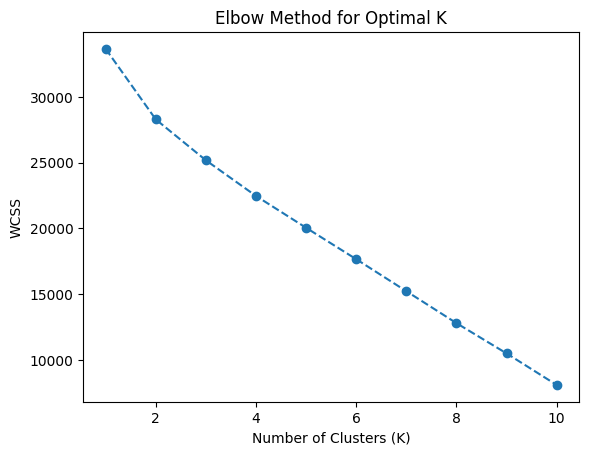

In [18]:
#First implimenting K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []  #Listing to store Within-Cluster Sum of Squares(WCSS)
K_range = range(1, 11)  #Checking for K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10, max_iter=10000)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  #Inertia = WCSS

#Plotting the "Elbow" Curve
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f'Silhouette Score for K={k}: {score:.2f}')


Silhouette Score for K=2: 0.32
Silhouette Score for K=3: 0.33
Silhouette Score for K=4: 0.39


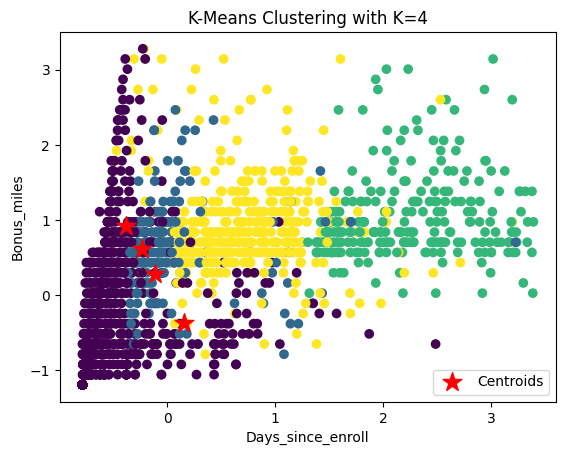

In [20]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++', n_init=10, max_iter=10000)
df['Cluster_KMeans'] = kmeans.fit_predict(df)

#Visualizing K-Means cluster
plt.scatter(df.iloc[:, 3], df.iloc[:, 4], c=df['Cluster_KMeans'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='red', label='Centroids')
plt.xlabel('Days_since_enroll')
plt.ylabel('Bonus_miles')
plt.title('K-Means Clustering with K=4')
plt.legend()
plt.show()


### **Hierarchical Clustering**

In [21]:
#Implimenting hierarchical clustering.
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['single','ward', 'complete', 'average']

for method in linkage_methods:
    #Applying hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=4, linkage=method)
    df[f'Cluster_{method}'] = hc.fit_predict(df)

    #Computing silhouette score
    score = silhouette_score(df, df[f'Cluster_{method}'])
    print(f"Silhouette Score for {method} linkage: {score:.2f}")

Silhouette Score for single linkage: 0.80
Silhouette Score for ward linkage: 0.46
Silhouette Score for complete linkage: 0.80
Silhouette Score for average linkage: 0.80


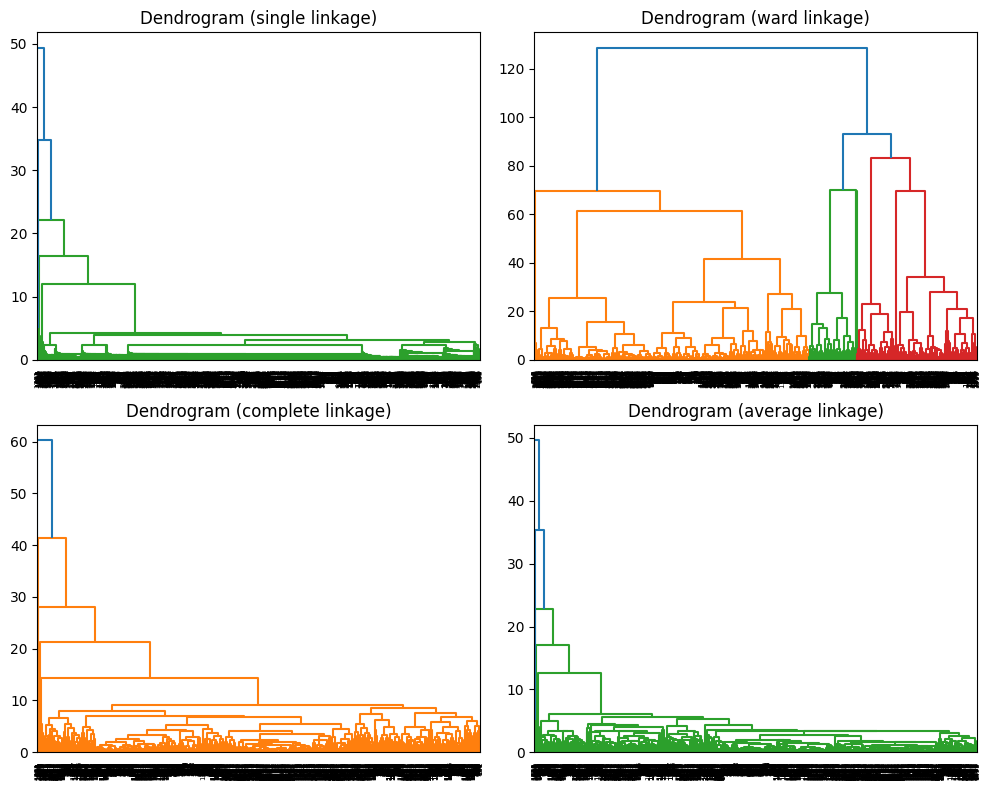

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Visualizing the dendrogram
plt.figure(figsize=(10, 8))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    linked = linkage(df, method=method)
    dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
    plt.title(f"Dendrogram ({method} linkage)")
plt.tight_layout()
plt.show()


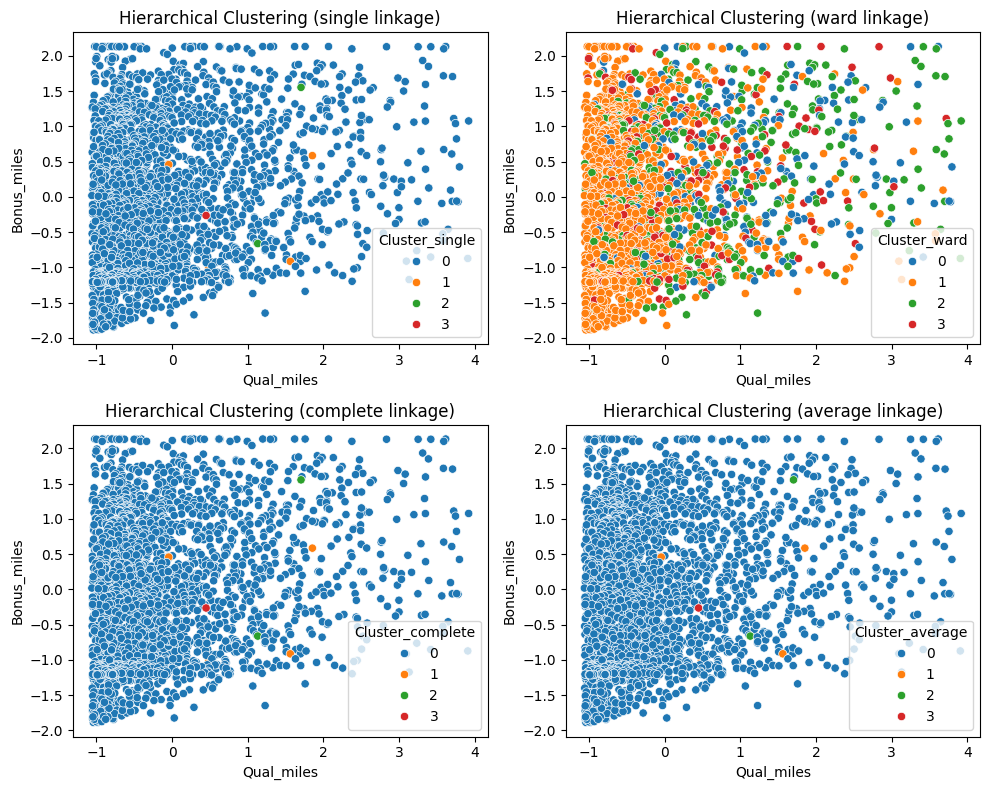

In [23]:
#Visualizing clusterings for different linkages
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    sns.scatterplot(x=df['Balance'], y=df['Days_since_enroll'], hue=df[f'Cluster_{method}'], palette='tab10', ax=axes[i])
    axes[i].set_title(f"Hierarchical Clustering ({method} linkage)")
    axes[i].set_xlabel("Qual_miles")
    axes[i].set_ylabel("Bonus_miles")

plt.tight_layout()
plt.show()


### **DBSCAN Clustering**

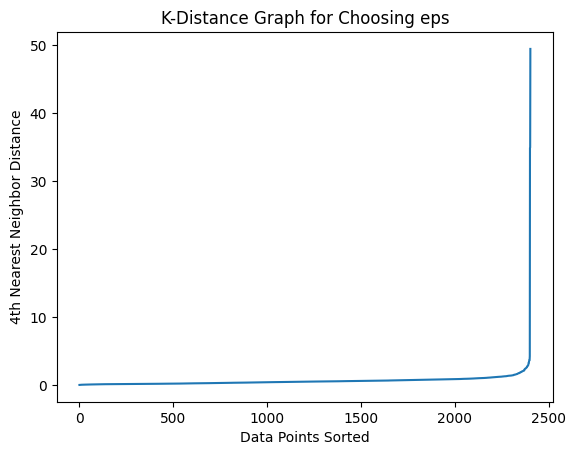

In [24]:
#importing DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

#Finding the optimal epsilon value using k-distance plot
neigh = NearestNeighbors(n_neighbors=5)  #Choosing 5 because thumb rule
neigh.fit(df)
distances, indices =neigh.kneighbors(df)

#Sorting distances and plotting
sorted_distances = np.sort(distances[:, 4])  #Taking the 4th nearest neighbor distance
plt.plot(sorted_distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph for Choosing eps")
plt.show()


In [25]:
#Applying DBSCAN with chosen eps and min_samples
dbscan = DBSCAN(eps=10, min_samples=4)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df)

#Counting the number of clusters that arefound
n_clusters = len(set(df['Cluster_DBSCAN'])) - (1 if -1 in df['Cluster_DBSCAN'] else 0)
print(f"Number of clusters found: {n_clusters}")


Number of clusters found: 5


In [26]:
#Checking if clustering is meaningful
if n_clusters > 1:
    score = silhouette_score(df, df['Cluster_DBSCAN'])
    print(f"Silhouette Score for DBSCAN: {score:.2f}")
else:
    print("Silhouette Score cannot be calculated as there is only one cluster.")


Silhouette Score for DBSCAN: 0.66


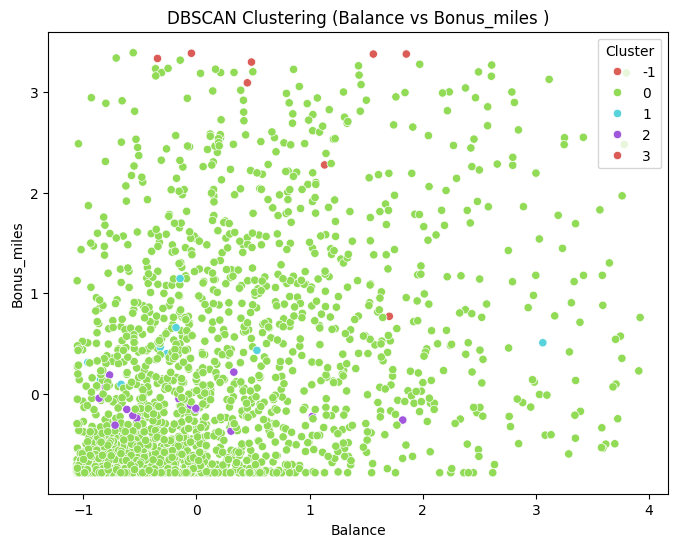

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['Cluster_DBSCAN'], palette='hls')
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.title("DBSCAN Clustering (Balance vs Bonus_miles )")
plt.legend(title="Cluster")
plt.show()


## **Interpreting Different Clustering Algorithms**

### **From K-Means Clustering**

 - The data set is divivided into four clusters with red star as their centroids from bottom to top with clusters from left to right respectively

 - Clusters with dark colors might represent customers who enrolled recently vs yellow and green customers with who enrolled begining of the program

 - Purple colored cluster needs to be more active so some sort of marketing should be done among these customers like special discounts,special offers

 - Customers in green color cluster should be awarded more because of their loyalty.

 - With more attention to the customers with promotions and special programs it is possible to increase their activity even in the yellow and blue customers

### **From Hierarchical Clustering**

 - Except ward linkage method all other methods are terribly distributed to the point you can't interprete well with most of the points are in one large cluster.

 - Since ward linkage minimizes variance with in clusters leads to some what better defined than the rest of clusters.

 - Only ward linkage performs well in this clustering algorithms.may be because of it highly sensitive towards noice/outliers.

 - With that said the hierarchical clustering is not suitable for large data sets.

### **From DBSCAN Clustering**

 - Since it is density based clustering and significant points are in single cluster suggests that it's high variance and sparse region making it difficult to understand.

 - With the several small clusters represents there are few local patterns like certain groups which are belong to certain mile ranges

 - As balance increases less dense clusters formed means with increase of epsilon and mimpts parameter tuning they tend to become noice.

 - When it comes to performance DBSCAN performs better than K-means and hierarchy clustering in detecting noice/outliers and form clusters varying shapes.